# Program to predict sales of each product at a particular store.

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. 

# problem statement

Here we will use the given dataset named "bigdatamart_train.csv" and "bigdatamart_test" to calculate conditional probabilities and expectations and predict the sales of each product at a particular store.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train=pd.read_csv("bigdatamart_train.csv")
df_test=pd.read_csv("bigdatamart_test.csv")

In [3]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df_train.shape

(8523, 12)

In [5]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
df_test.shape

(5681, 11)

# Getting basic statistics from the dataset

In [7]:
#basic info abut the attributes
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Ra

In [8]:
print(df_train.shape)
print(df_test.shape)

(8523, 12)
(5681, 11)


In [9]:
print(df_train.dtypes)
print("\n\n",df_test.dtypes)

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


 Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object


In [10]:
print(df_train.columns)
print("\n\n",df_test.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


 Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


# finding nan values in training data

From df_train

In [11]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Here we found missing values in column ["Item_Weight","Outlet_Size"]

In [12]:
df_train["Item_Weight"].shape

(8523,)

In [13]:
df_train["Outlet_Size"].shape

(8523,)

when we try to remove NaN from columns ["Item_Weight","Outlet_Size"] it may result in loss of data since the missing count is more in both column

in order to overcome this we use the mean value or median value of the column to fill the missing data

so here we replace the missing value with the average of the columns rather with the median value

In [14]:
#Relacing NaN values with mean
df_train['Item_Weight'].mean()


12.857645184136183

In [15]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)

In [16]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [17]:
#Drop NaN values in Outlet_size
df_train.dropna(inplace=True)


In [18]:

df_train.dropna().shape

(6113, 12)

In [19]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [20]:
df_train.shape

(6113, 12)

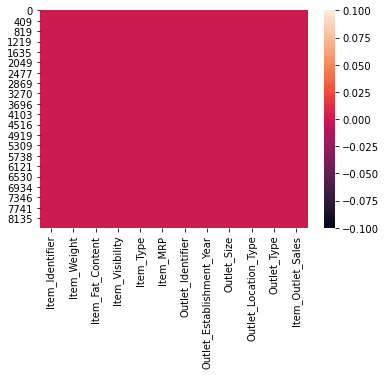

In [21]:
#missing value in data visuvalization
sns.heatmap(df_train.isnull())

# finding nan values in testing data


From df_test

In [22]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [23]:
df_test["Item_Weight"].shape

(5681,)

In [24]:
df_test["Outlet_Size"].shape

(5681,)

In [25]:
#Relacing NaN values with mean
df_test['Item_Weight'].mean()


12.695633368756374

In [26]:
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(),inplace=True)

In [27]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [28]:
df_test.dropna(how="any",inplace=True)


In [29]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [30]:
df_test.shape

(4075, 11)

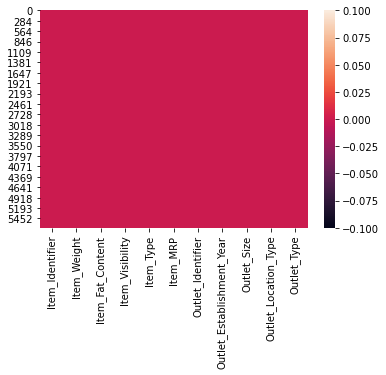

In [31]:
#missing value in data visuvalization
sns.heatmap(df_test.isnull())

# Exploring object datatype attributes in training data:

    =>Item_Identifier
    =>Item_Fat_Content
    =>Item_Type
    =>Outlet_Identifier
    =>Outlet_Size
    =>Outlet_Location_Type
    =>Outlet_Type
    




In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6113 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6113 non-null   object 
 1   Item_Weight                6113 non-null   float64
 2   Item_Fat_Content           6113 non-null   object 
 3   Item_Visibility            6113 non-null   float64
 4   Item_Type                  6113 non-null   object 
 5   Item_MRP                   6113 non-null   float64
 6   Outlet_Identifier          6113 non-null   object 
 7   Outlet_Establishment_Year  6113 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       6113 non-null   object 
 10  Outlet_Type                6113 non-null   object 
 11  Item_Outlet_Sales          6113 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 620.9+ KB


In [33]:
#Item_Identifier
df_train["Item_Identifier"].value_counts()

NCL31    7
FDV26    7
FDQ40    7
DRP35    7
FDT07    7
        ..
FDE52    1
FDZ02    1
NCV42    1
FDN51    1
NCX17    1
Name: Item_Identifier, Length: 1555, dtype: int64

In [34]:
df_train["Item_Identifier"].value_counts().shape

(1555,)

it is not possible to convert 1559 unique values to integer. so droping f column is recommended 

In [35]:
df_train.drop(["Item_Identifier"], axis=1, inplace=True)
df_test.drop(["Item_Identifier"], axis=1, inplace=True)


In [36]:
#Item_Fat_Content
df_train["Item_Fat_Content"].value_counts()

Low Fat    3641
Regular    2076
LF          233
reg          82
low fat      81
Name: Item_Fat_Content, dtype: int64

here we can observe that the values are misspelled

In [37]:

# combining Item_Fat_Content misspelled
df_train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
df_test['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [38]:
df_train["Item_Fat_Content"].value_counts()

Low Fat    3955
Regular    2158
Name: Item_Fat_Content, dtype: int64

In [39]:
#Item_Type
df_train["Item_Type"].value_counts()

Fruits and Vegetables    883
Snack Foods              868
Household                649
Frozen Foods             615
Dairy                    496
Canned                   471
Baking Goods             463
Health and Hygiene       367
Soft Drinks              312
Meat                     309
Breads                   179
Hard Drinks              148
Others                   123
Starchy Foods            105
Breakfast                 79
Seafood                   46
Name: Item_Type, dtype: int64

In [40]:
#Outlet_Identifier
df_train["Outlet_Identifier"].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT018    928
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [41]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Item_Fat_Content',"Item_Type","Outlet_Identifier","Outlet_Size"]
le = LabelEncoder()
for i in var_mod:
    df_train[i] = le.fit_transform(df_train[i])
df_train.dtypes

Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [42]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,6,1999,1,Tier 1,Supermarket Type1,3735.1380
1,5.920,1,0.019278,14,48.2692,1,2009,1,Tier 3,Supermarket Type2,443.4228
2,17.500,0,0.016760,10,141.6180,6,1999,1,Tier 1,Supermarket Type1,2097.2700
4,8.930,0,0.000000,9,53.8614,0,1987,0,Tier 3,Supermarket Type1,994.7052
5,10.395,1,0.000000,0,51.4008,1,2009,1,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...
8517,20.750,1,0.083607,5,178.8318,5,1997,2,Tier 1,Supermarket Type1,3608.6360
8518,6.865,0,0.056783,13,214.5218,0,1987,0,Tier 3,Supermarket Type1,2778.3834
8520,10.600,0,0.035186,8,85.1224,4,2004,2,Tier 2,Supermarket Type1,1193.1136
8521,7.210,1,0.145221,13,103.1332,1,2009,1,Tier 3,Supermarket Type2,1845.5976


In [43]:
df_train["Outlet_Location_Type"].value_counts()

Tier 3    2795
Tier 1    2388
Tier 2     930
Name: Outlet_Location_Type, dtype: int64

In [44]:
#convert Outlet_Location_Type attribute of dtype object to integer
df_train["Outlet_Location_Type"]=df_train['Outlet_Location_Type'].map({'Tier 1': 1, 'Tier 2': 2,"Tier 3":3}).astype(int)
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,6,1999,1,1,Supermarket Type1,3735.1380
1,5.920,1,0.019278,14,48.2692,1,2009,1,3,Supermarket Type2,443.4228
2,17.500,0,0.016760,10,141.6180,6,1999,1,1,Supermarket Type1,2097.2700
4,8.930,0,0.000000,9,53.8614,0,1987,0,3,Supermarket Type1,994.7052
5,10.395,1,0.000000,0,51.4008,1,2009,1,3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...
8517,20.750,1,0.083607,5,178.8318,5,1997,2,1,Supermarket Type1,3608.6360
8518,6.865,0,0.056783,13,214.5218,0,1987,0,3,Supermarket Type1,2778.3834
8520,10.600,0,0.035186,8,85.1224,4,2004,2,2,Supermarket Type1,1193.1136
8521,7.210,1,0.145221,13,103.1332,1,2009,1,3,Supermarket Type2,1845.5976


In [45]:
df_train["Outlet_Type"].value_counts()

Supermarket Type1    3722
Supermarket Type3     935
Supermarket Type2     928
Grocery Store         528
Name: Outlet_Type, dtype: int64

In [46]:
#convert Outlet_Type attribute of dtype object to integer
df_train["Outlet_Type"]=df_train['Outlet_Type'].map({'Supermarket Type1': 1, 'Supermarket Type2': 2,"Supermarket Type3":3,"Grocery Store":4}).astype(int)
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,6,1999,1,1,1,3735.1380
1,5.920,1,0.019278,14,48.2692,1,2009,1,3,2,443.4228
2,17.500,0,0.016760,10,141.6180,6,1999,1,1,1,2097.2700
4,8.930,0,0.000000,9,53.8614,0,1987,0,3,1,994.7052
5,10.395,1,0.000000,0,51.4008,1,2009,1,3,2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...
8517,20.750,1,0.083607,5,178.8318,5,1997,2,1,1,3608.6360
8518,6.865,0,0.056783,13,214.5218,0,1987,0,3,1,2778.3834
8520,10.600,0,0.035186,8,85.1224,4,2004,2,2,1,1193.1136
8521,7.210,1,0.145221,13,103.1332,1,2009,1,3,2,1845.5976


# Exploring object datatype attributes in testing data:

    =>Item_Identifier
    =>Item_Fat_Content
    =>Item_Type
    =>Outlet_Identifier
    =>Outlet_Size
    =>Outlet_Location_Type
    =>Outlet_Type
    




In [47]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4075 entries, 0 to 5677
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                4075 non-null   float64
 1   Item_Fat_Content           4075 non-null   object 
 2   Item_Visibility            4075 non-null   float64
 3   Item_Type                  4075 non-null   object 
 4   Item_MRP                   4075 non-null   float64
 5   Outlet_Identifier          4075 non-null   object 
 6   Outlet_Establishment_Year  4075 non-null   int64  
 7   Outlet_Size                4075 non-null   object 
 8   Outlet_Location_Type       4075 non-null   object 
 9   Outlet_Type                4075 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 350.2+ KB


In [48]:
#Item_Fat_Content
df_test["Item_Fat_Content"].value_counts()

Low Fat    2635
Regular    1440
Name: Item_Fat_Content, dtype: int64

In [49]:
#outlet_Identifier
df_test["Outlet_Identifier"].value_counts()

OUT027    624
OUT013    621
OUT035    620
OUT046    620
OUT049    620
OUT018    618
OUT019    352
Name: Outlet_Identifier, dtype: int64

In [50]:
#Outlet_Size
df_test["Outlet_Size"].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [51]:
#Outlet_Location_Type
df_test["Outlet_Location_Type"].value_counts()

Tier 3    1863
Tier 1    1592
Tier 2     620
Name: Outlet_Location_Type, dtype: int64

In [52]:
#Outlet_Type
df_test["Outlet_Type"].value_counts()

Supermarket Type1    2481
Supermarket Type3     624
Supermarket Type2     618
Grocery Store         352
Name: Outlet_Type, dtype: int64

In [53]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Item_Fat_Content',"Item_Type","Outlet_Identifier","Outlet_Size"]
le = LabelEncoder()
for i in var_mod:
    df_test[i] = le.fit_transform(df_test[i])
df_test.dtypes

Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [54]:
df_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,0,0.007565,13,107.8622,6,1999,1,Tier 1,Supermarket Type1
4,12.695633,1,0.118599,4,234.2300,3,1985,1,Tier 3,Supermarket Type3
5,9.800000,1,0.063817,6,117.1492,5,1997,2,Tier 1,Supermarket Type1
6,19.350000,1,0.082602,0,50.1034,1,2009,1,Tier 3,Supermarket Type2
7,12.695633,0,0.015782,0,81.0592,3,1985,1,Tier 3,Supermarket Type3


In [55]:
df_test["Outlet_Location_Type"].value_counts()

Tier 3    1863
Tier 1    1592
Tier 2     620
Name: Outlet_Location_Type, dtype: int64

In [56]:
#convert Outlet_Location_Type attribute of dtype object to integer
df_test["Outlet_Location_Type"]=df_test['Outlet_Location_Type'].map({'Tier 1': 1, 'Tier 2': 2,"Tier 3":3}).astype(int)
df_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,0,0.007565,13,107.8622,6,1999,1,1,Supermarket Type1
4,12.695633,1,0.118599,4,234.2300,3,1985,1,3,Supermarket Type3
5,9.800000,1,0.063817,6,117.1492,5,1997,2,1,Supermarket Type1
6,19.350000,1,0.082602,0,50.1034,1,2009,1,3,Supermarket Type2
7,12.695633,0,0.015782,0,81.0592,3,1985,1,3,Supermarket Type3


In [57]:
df_test["Outlet_Type"].value_counts()

Supermarket Type1    2481
Supermarket Type3     624
Supermarket Type2     618
Grocery Store         352
Name: Outlet_Type, dtype: int64

In [58]:
#convert Outlet_Type attribute of dtype object to integer
df_test["Outlet_Type"]=df_test['Outlet_Type'].map({'Supermarket Type1': 1, 'Supermarket Type2': 2,"Supermarket Type3":3,"Grocery Store":4}).astype(int)
df_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,0,0.007565,13,107.8622,6,1999,1,1,1
4,12.695633,1,0.118599,4,234.2300,3,1985,1,3,3
5,9.800000,1,0.063817,6,117.1492,5,1997,2,1,1
6,19.350000,1,0.082602,0,50.1034,1,2009,1,3,2
7,12.695633,0,0.015782,0,81.0592,3,1985,1,3,3
...,...,...,...,...,...,...,...,...,...,...
5673,7.070000,0,0.094053,13,116.0834,1,2009,1,3,2
5674,15.700000,0,0.030704,7,43.2770,5,1997,2,1,1
5675,13.000000,1,0.070411,13,63.4484,6,1999,1,1,1
5676,10.500000,1,0.013496,13,141.3154,5,1997,2,1,1


In [59]:
df_train.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000
mean,12.888856,0.353018,0.064505,7.221004,141.256859,3.065434,1995.794373,1.238181,2.066579,1.716833,2322.688445
std,4.073798,0.477947,0.050092,4.208809,62.229701,2.047450,8.842615,0.697463,0.918461,1.013556,1741.592093
min,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,1.000000,1.000000,33.955800
25%,9.800000,0.000000,0.026681,4.000000,94.012000,1.000000,1987.000000,1.000000,1.000000,1.000000,974.731200
50%,12.857645,0.000000,0.052811,6.000000,143.178600,3.000000,1997.000000,1.000000,2.000000,1.000000,1928.156800
75%,15.700000,1.000000,0.092834,10.000000,185.892400,5.000000,2004.000000,2.000000,3.000000,2.000000,3271.075400
max,21.350000,1.000000,0.328391,15.000000,266.888400,6.000000,2009.000000,2.000000,3.000000,4.000000,13086.964800


1)Here we find that the mean is higher than median in all columns

If the mean is higher than the median, the distribution is positively skewed.

2)the maximum and the 75% had a wide range of difference than it have to be normal in attributes "Item_MRP"

From 1) and 2) we infer that we may have some outliers in some of the attributes and skewness



In [60]:
df_test.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000,4075.000000
mean,12.667170,0.353374,0.063694,7.241718,140.650366,3.066012,1995.791166,1.238282,2.066503,1.717055
std,4.026125,0.478076,0.049317,4.226204,61.771647,2.047260,8.842445,0.697430,0.918497,1.013745
min,4.555000,0.000000,0.000000,0.000000,31.990000,0.000000,1985.000000,0.000000,1.000000,1.000000
25%,9.600000,0.000000,0.026563,4.000000,93.729100,1.000000,1987.000000,1.000000,1.000000,1.000000
50%,12.695633,0.000000,0.052400,6.000000,141.281200,3.000000,1997.000000,1.000000,2.000000,1.000000
75%,15.350000,1.000000,0.091029,10.000000,185.460800,5.000000,2004.000000,2.000000,3.000000,2.000000
max,21.350000,1.000000,0.323637,15.000000,266.588400,6.000000,2009.000000,2.000000,3.000000,4.000000


1)Here we find that the mean is higher than median in all columns

If the mean is higher than the median, the distribution is positively skewed.

2)we cant find the maximum and the 75% had a wide range of difference than it have to be normal in attributes 

From 1) and 2) we infer that we may have some outliers in some of the attributes and skewness



# CORRELATION

In [61]:
corr_train=df_train.corr()
corr_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.028806,-0.008526,0.029920,0.029214,-0.005871,-0.004779,-0.011612,0.003330,-0.004842,0.008007
Item_Fat_Content,-0.028806,1.000000,0.047486,-0.145258,0.011656,0.004814,0.003629,-0.000979,-0.002116,-0.003690,0.013739
Item_Visibility,-0.008526,0.047486,1.000000,-0.025506,-0.000651,-0.039651,-0.087452,0.096773,-0.103078,0.178340,-0.105854
Item_Type,0.029920,-0.145258,-0.025506,1.000000,0.036465,0.004036,0.005424,-0.001771,0.003727,-0.002395,0.020482
Item_MRP,0.029214,0.011656,-0.000651,0.036465,1.000000,0.000088,0.011632,0.005827,0.000321,-0.012082,0.588939
Outlet_Identifier,-0.005871,0.004814,-0.039651,0.004036,0.000088,1.000000,0.222275,0.568595,-0.765696,-0.293822,0.083344
Outlet_Establishment_Year,-0.004779,0.003629,-0.087452,0.005424,0.011632,0.222275,1.000000,0.298431,-0.089391,-0.456910,-0.057850
Outlet_Size,-0.011612,-0.000979,0.096773,-0.001771,0.005827,0.568595,0.298431,1.000000,-0.635185,0.125048,-0.129076
Outlet_Location_Type,0.003330,-0.002116,-0.103078,0.003727,0.000321,-0.765696,-0.089391,-0.635185,1.000000,0.162090,0.206719
Outlet_Type,-0.004842,-0.003690,0.178340,-0.002395,-0.012082,-0.293822,-0.456910,0.125048,0.162090,1.000000,-0.081497


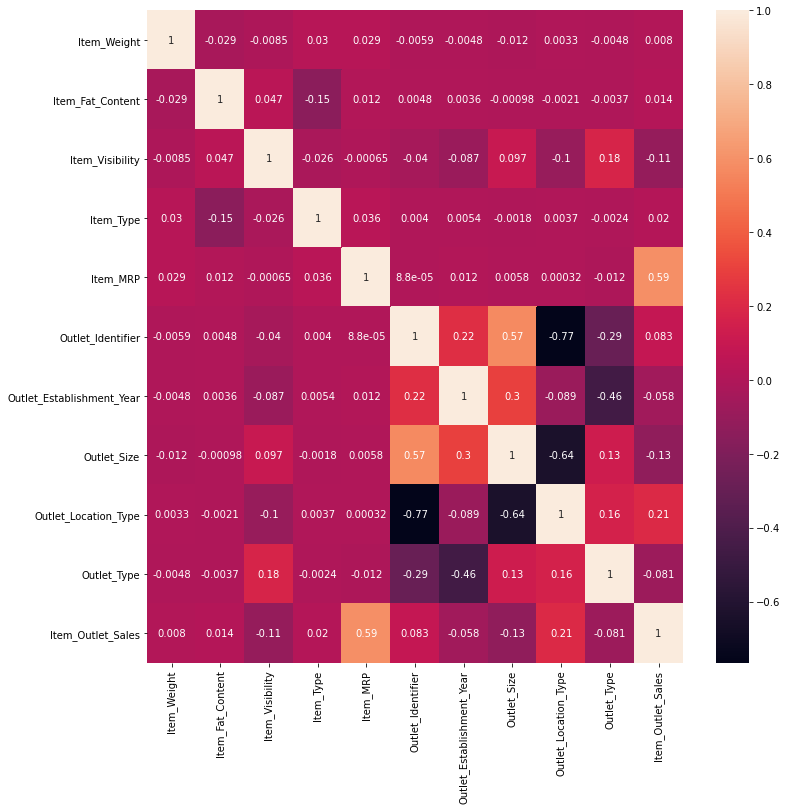

In [62]:
plt.figure(figsize=(12,12))
sns.heatmap(corr_train,annot=True)

Key observation

from the above result it is clear that some columns making positive correlation while some has negative correlation to the target variable 

columns making positive correlation

1)Item_Weight

2)Item_Fat_Content

3)Item_Type

4)Item_MRP  

5)Outlet_Identifier  

6)Outlet_Location_Type

                


columns making negative correlation

1)Item_Visibility

2)Outlet_Establishment_Year

3)Outlet_Size                  

4)Outlet_Type                   




# plotting outliers in training data


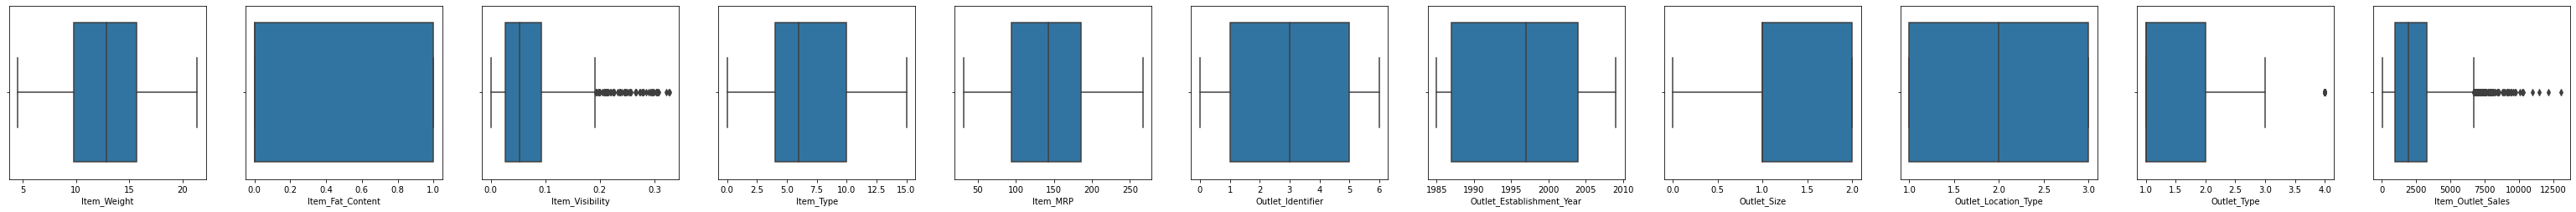

In [63]:
collist=df_train.columns.values
ncol=15
nrow=10
plt.figure(figsize=(5*ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df_train[collist[i]])



we found outliers in "Item_visibility" and in our target variable "Item_outlet_sales"

# plotting outliers in testing data


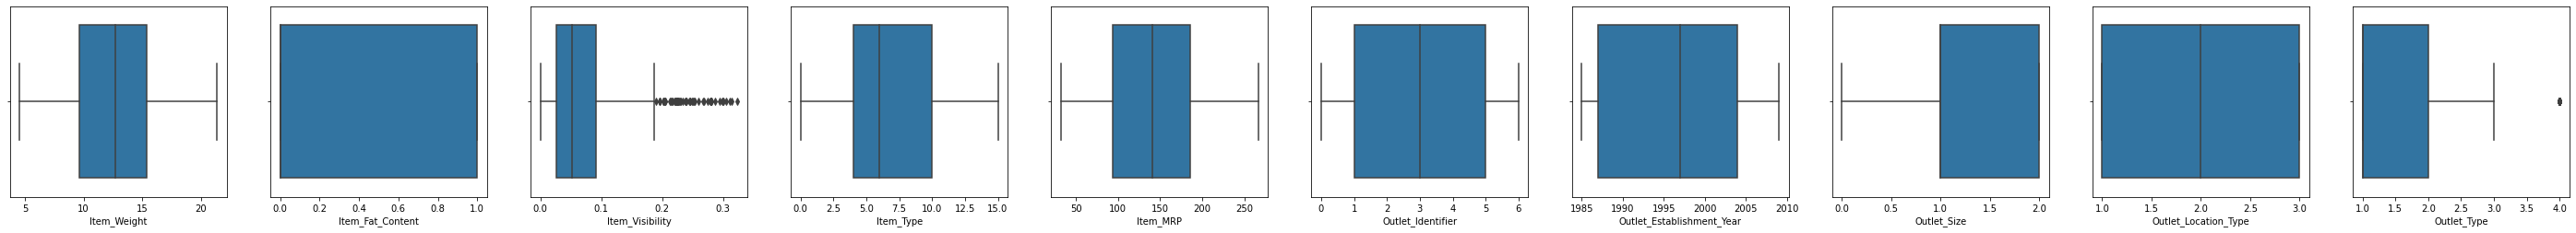

In [64]:
collist=df_test.columns.values
ncol=15
nrow=10
plt.figure(figsize=(5*ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df_test[collist[i]])



here we found outliers in Item_visibility

# skewness in training dataset

In [65]:
df_train.skew()

Item_Weight                  0.092069
Item_Fat_Content             0.615256
Item_Visibility              1.157526
Item_Type                    0.103728
Item_MRP                     0.125353
Outlet_Identifier           -0.089000
Outlet_Establishment_Year    0.049520
Outlet_Size                 -0.362313
Outlet_Location_Type        -0.131948
Outlet_Type                  1.086107
Item_Outlet_Sales            1.145497
dtype: float64

Skewness threshold range : +/-0.5
    
from the above observation we find skewness in many attributes namely
    
    1)Item_Fat_Content
    
    2)Item_Visibility
    
    3)Outlet_Type    
    
    4)Item_Outlet_Sales
    
    
    

In [66]:
df_test.skew()

Item_Weight                  0.150551
Item_Fat_Content             0.613700
Item_Visibility              1.173447
Item_Type                    0.094017
Item_MRP                     0.142399
Outlet_Identifier           -0.089458
Outlet_Establishment_Year    0.049865
Outlet_Size                 -0.362461
Outlet_Location_Type        -0.131812
Outlet_Type                  1.085556
dtype: float64

Skewness threshold range : +/-0.5
    
from the above observation we find skewness in many attributes namely
    
     1)Item_Fat_Content
    
    2)Item_Visibility
    
    3)Outlet_Type 
    
We can  also confirm that there are skewness  from the graphical representaion of the univariate analysis which is displayed 
above



# DATA CLEANING

# Dropping columns not related to target

In [67]:
df_train.drop(["Item_Visibility"], axis=1, inplace=True)
df_test.drop(["Item_Visibility"], axis=1, inplace=True)
df_train

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,4,249.8092,6,1999,1,1,1,3735.1380
1,5.920,1,14,48.2692,1,2009,1,3,2,443.4228
2,17.500,0,10,141.6180,6,1999,1,1,1,2097.2700
4,8.930,0,9,53.8614,0,1987,0,3,1,994.7052
5,10.395,1,0,51.4008,1,2009,1,3,2,556.6088
...,...,...,...,...,...,...,...,...,...,...
8517,20.750,1,5,178.8318,5,1997,2,1,1,3608.6360
8518,6.865,0,13,214.5218,0,1987,0,3,1,2778.3834
8520,10.600,0,8,85.1224,4,2004,2,2,1,1193.1136
8521,7.210,1,13,103.1332,1,2009,1,3,2,1845.5976


In [68]:
df_train

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,4,249.8092,6,1999,1,1,1,3735.1380
1,5.920,1,14,48.2692,1,2009,1,3,2,443.4228
2,17.500,0,10,141.6180,6,1999,1,1,1,2097.2700
4,8.930,0,9,53.8614,0,1987,0,3,1,994.7052
5,10.395,1,0,51.4008,1,2009,1,3,2,556.6088
...,...,...,...,...,...,...,...,...,...,...
8517,20.750,1,5,178.8318,5,1997,2,1,1,3608.6360
8518,6.865,0,13,214.5218,0,1987,0,3,1,2778.3834
8520,10.600,0,8,85.1224,4,2004,2,2,1,1193.1136
8521,7.210,1,13,103.1332,1,2009,1,3,2,1845.5976


In [69]:
df_test

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,0,13,107.8622,6,1999,1,1,1
4,12.695633,1,4,234.2300,3,1985,1,3,3
5,9.800000,1,6,117.1492,5,1997,2,1,1
6,19.350000,1,0,50.1034,1,2009,1,3,2
7,12.695633,0,0,81.0592,3,1985,1,3,3
...,...,...,...,...,...,...,...,...,...
5673,7.070000,0,13,116.0834,1,2009,1,3,2
5674,15.700000,0,7,43.2770,5,1997,2,1,1
5675,13.000000,1,13,63.4484,6,1999,1,1,1
5676,10.500000,1,13,141.3154,5,1997,2,1,1


# REMOVING OUTLIERS

# Z SCORE TECHNIQUE FOR TRAINING DATASET

In [70]:
from scipy.stats import zscore
z_train=np.abs(zscore(df_train))
z_train.shape

(6113, 10)

In [71]:
threshold=3
print(np.where(z_train>3))

(array([  94,  231,  262,  327,  337,  535,  574,  710,  725,  896, 1030,
       1071, 1427, 1501, 1779, 1976, 2201, 2207, 2247, 2347, 2637, 2647,
       2672, 3053, 3088, 3090, 3327, 3331, 3399, 3480, 3553, 3607, 3695,
       3701, 3729, 3925, 4002, 4101, 4274, 4387, 4529, 4580, 4678, 4682,
       4720, 4931, 5021, 5142, 5143, 5177, 5224, 5253, 5413, 5508, 5558,
       5610, 5688, 5889, 5913], dtype=int64), array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9], dtype=int64))


In [72]:
df_train_new=df_train[(z_train<3).all(axis=1)]
df_train_new.shape

(6054, 10)

In [73]:
df_train.shape

(6113, 10)

Z SCORE TECHNIQUE FOR TESTING DATASET

In [74]:
from scipy.stats import zscore
z_test=np.abs(zscore(df_test))
z_test.shape

(4075, 9)

In [75]:
threshold=3
print(np.where(z_test>3))

(array([], dtype=int64), array([], dtype=int64))


In [76]:
df_test_new=df_test[(z_test<3).all(axis=1)]
df_test_new

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,0,13,107.8622,6,1999,1,1,1
4,12.695633,1,4,234.2300,3,1985,1,3,3
5,9.800000,1,6,117.1492,5,1997,2,1,1
6,19.350000,1,0,50.1034,1,2009,1,3,2
7,12.695633,0,0,81.0592,3,1985,1,3,3
...,...,...,...,...,...,...,...,...,...
5673,7.070000,0,13,116.0834,1,2009,1,3,2
5674,15.700000,0,7,43.2770,5,1997,2,1,1
5675,13.000000,1,13,63.4484,6,1999,1,1,1
5676,10.500000,1,13,141.3154,5,1997,2,1,1


In [77]:
df_test.shape

(4075, 9)

In [78]:
df_test_new.shape

(4075, 9)

percentage data loss

In [79]:
loss_percentage_train=(6113-5973)/6113*100
loss_percentage_train

2.2902012105349256

In [80]:
loss_percentage_test=(4075-4016)/4075*100
loss_percentage_test

1.4478527607361962

# Building A Model

# Creating Train Test Split

In [81]:
x_train=df_train_new.drop(["Item_Outlet_Sales"],axis=1)
x_train

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,0,4,249.8092,6,1999,1,1,1
1,5.920,1,14,48.2692,1,2009,1,3,2
2,17.500,0,10,141.6180,6,1999,1,1,1
4,8.930,0,9,53.8614,0,1987,0,3,1
5,10.395,1,0,51.4008,1,2009,1,3,2
...,...,...,...,...,...,...,...,...,...
8517,20.750,1,5,178.8318,5,1997,2,1,1
8518,6.865,0,13,214.5218,0,1987,0,3,1
8520,10.600,0,8,85.1224,4,2004,2,2,1
8521,7.210,1,13,103.1332,1,2009,1,3,2


In [82]:
y_train=df_train_new["Item_Outlet_Sales"]
y_train

0       3735.1380
1        443.4228
2       2097.2700
4        994.7052
5        556.6088
          ...    
8517    3608.6360
8518    2778.3834
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 6054, dtype: float64

In [83]:
x_test=df_test_new
x_test

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,0,13,107.8622,6,1999,1,1,1
4,12.695633,1,4,234.2300,3,1985,1,3,3
5,9.800000,1,6,117.1492,5,1997,2,1,1
6,19.350000,1,0,50.1034,1,2009,1,3,2
7,12.695633,0,0,81.0592,3,1985,1,3,3
...,...,...,...,...,...,...,...,...,...
5673,7.070000,0,13,116.0834,1,2009,1,3,2
5674,15.700000,0,7,43.2770,5,1997,2,1,1
5675,13.000000,1,13,63.4484,6,1999,1,1,1
5676,10.500000,1,13,141.3154,5,1997,2,1,1


In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Findind Best Algorithm 

Here we will test and train our data with

    1)Linear regression
    
    2)Ridge Regression
    
    3)Lasso Regression

# 1)Linear regression

In [90]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(fit_intercept=True,normalize=True)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
for i in range(1,10):
    cvscore=cross_val_score(LinearRegression(),x_train,y_train,cv=5).mean()
    print("at cv",i ,"\ncross_value_score=",{cvscore*100} )


at cv 1 
cross_value_score= {54.938437692878686}
at cv 2 
cross_value_score= {54.938437692878686}
at cv 3 
cross_value_score= {54.938437692878686}
at cv 4 
cross_value_score= {54.938437692878686}
at cv 5 
cross_value_score= {54.938437692878686}
at cv 6 
cross_value_score= {54.938437692878686}
at cv 7 
cross_value_score= {54.938437692878686}
at cv 8 
cross_value_score= {54.938437692878686}
at cv 9 
cross_value_score= {54.938437692878686}


# 2) Ridge regression

In [86]:
#hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
parameters={"alpha":[.0001,.001,.01,.1,1,10],"fit_intercept":[True,False],"normalize":[True,False],"copy_X":[True,False],"tol":[.0001,.001,.01,.1,1,10]}
rd=Ridge()
clf=GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.001, 'copy_X': True, 'fit_intercept': True, 'normalize': True, 'tol': 0.0001}


In [87]:
rd=Ridge(alpha= 0.001, copy_X= True, fit_intercept= True, normalize= True, tol= 0.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
rd_pred=rd.predict(x_test)
for j in range(2,10):
    rdscore=cross_val_score(rd,x_train,y_train,cv=j)
    rdc=rdscore.mean()
    print("At cv:",j)
    print("cross validation score is : ",rdc*100)
    print("\n")


At cv: 2
cross validation score is :  54.93506801936782


At cv: 3
cross validation score is :  54.96655699431776


At cv: 4
cross validation score is :  54.902700826504926


At cv: 5
cross validation score is :  54.93853308210783


At cv: 6
cross validation score is :  55.01201319149146


At cv: 7
cross validation score is :  55.01034651028862


At cv: 8
cross validation score is :  54.9791144728176


At cv: 9
cross validation score is :  54.99459389927236




# 3)Lasso

In [88]:
#hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters={"alpha":[.0001,.001,.01,.1,1,10],"random_state":list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [89]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
ls_pred=ls.predict(x_test)
for j in range(2,10):
    lsscore=cross_val_score(ls,x_train,y_train,cv=j)
    lsc=lsscore.mean()
    print("At cv:",j)
    print("cross validation score is : ",lsc*100)
    print("\n")


At cv: 2
cross validation score is :  54.934673745938014


At cv: 3
cross validation score is :  54.96614529996579


At cv: 4
cross validation score is :  54.90242227117991


At cv: 5
cross validation score is :  54.938437998797504


At cv: 6
cross validation score is :  55.01180175198552


At cv: 7
cross validation score is :  55.01024764932237


At cv: 8
cross validation score is :  54.97880943891729


At cv: 9
cross validation score is :  54.99410834184481




from the above observation all the algorithms we used didnt do very well.Means more feature engineering is needed.

so we select Lasso method which works well when compared with others

# Saving the model

In [91]:
import joblib
joblib.dump(ls,"bigdatamart.pkl")


['bigdatamart.pkl']

In [92]:
td=np.array([19.3,1,13,50,1,2000,2,3,1])
td.shape

(9,)

In [93]:
td=td.reshape(1,-1)
td

array([[1.93e+01, 1.00e+00, 1.30e+01, 5.00e+01, 1.00e+00, 2.00e+03,
        2.00e+00, 3.00e+00, 1.00e+00]])

In [94]:
ls.predict(td) 

array([1021.17421771])